In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split




In [4]:
SEED = 4565123
np.random.seed(SEED)

# Lidando com dados faltantes

In [5]:
url = 'https://raw.githubusercontent.com/joutav/Bootcamp-data-science/master/modulo-5/dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'

dados = pd.read_excel(url)
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


Removi os dados cujo o paciente foi encaminhado para UTI e então fiz o preenchimento a partir do bfill e ffill. Encontrei um paciente cujo os dados sobre as doenças estava mcompletamente faltantes, o removi.

In [6]:
dados_nao_podem_ser_usados_para_treino = dados[dados.ICU == 1]
dados_podem_ser_usados = dados[dados.ICU != 1]

In [7]:
def preenche_dados(dados):
    # continuas
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby('PATIENT_VISIT_IDENTIFIER')[features_continuas_colunas].fillna(method = 'bfill').fillna(method = 'ffill')
    # categoricas
    features_categoricas = dados.iloc[:, :13]
    # saida
    saida = dados.iloc[:, -2:]
    # dado final
    dados_final = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True, axis =1)
    dados_final.columns = dados.columns
    return dados_final

dados_usaveis_preenchidos = preenche_dados(dados_podem_ser_usados)


In [8]:
print(dados_usaveis_preenchidos[dados_usaveis_preenchidos.isnull().any(axis=1)].PATIENT_VISIT_IDENTIFIER.unique()) 
dados_usaveis_preenchidos = dados_usaveis_preenchidos.dropna()

[199]


Paciente cujo os dados sobre as doenças está completamente faltante. Foi removido

In [9]:
# Verificação de dados faltantes no dataset que não pode ser usado para treinamento
print(dados_nao_podem_ser_usados_para_treino.isna().sum().to_string()) 

PATIENT_VISIT_IDENTIFIER              0
AGE_ABOVE65                           0
AGE_PERCENTIL                         0
GENDER                                0
DISEASE GROUPING 1                    0
DISEASE GROUPING 2                    0
DISEASE GROUPING 3                    0
DISEASE GROUPING 4                    0
DISEASE GROUPING 5                    0
DISEASE GROUPING 6                    0
HTN                                   0
IMMUNOCOMPROMISED                     0
OTHER                                 0
ALBUMIN_MEDIAN                      227
ALBUMIN_MEAN                        227
ALBUMIN_MIN                         227
ALBUMIN_MAX                         227
ALBUMIN_DIFF                        227
BE_ARTERIAL_MEDIAN                  227
BE_ARTERIAL_MEAN                    227
BE_ARTERIAL_MIN                     227
BE_ARTERIAL_MAX                     227
BE_ARTERIAL_DIFF                    227
BE_VENOUS_MEDIAN                    227
BE_VENOUS_MEAN                      227


Apenas os dados que não podem ser usados no treino apresentam dados faltantes, vou junta-los e preencher 

In [10]:
dados_completos = pd.concat([dados_nao_podem_ser_usados_para_treino, dados_usaveis_preenchidos])
dados_completo_preenchido = preenche_dados(dados_completos)
print(dados_completo_preenchido.isna().sum().to_string()) # Verificando se algum dado não foi preenchido

PATIENT_VISIT_IDENTIFIER            0
AGE_ABOVE65                         0
AGE_PERCENTIL                       0
GENDER                              0
DISEASE GROUPING 1                  0
DISEASE GROUPING 2                  0
DISEASE GROUPING 3                  0
DISEASE GROUPING 4                  0
DISEASE GROUPING 5                  0
DISEASE GROUPING 6                  0
HTN                                 0
IMMUNOCOMPROMISED                   0
OTHER                               0
ALBUMIN_MEDIAN                      0
ALBUMIN_MEAN                        0
ALBUMIN_MIN                         0
ALBUMIN_MAX                         0
ALBUMIN_DIFF                        0
BE_ARTERIAL_MEDIAN                  0
BE_ARTERIAL_MEAN                    0
BE_ARTERIAL_MIN                     0
BE_ARTERIAL_MAX                     0
BE_ARTERIAL_DIFF                    0
BE_VENOUS_MEDIAN                    0
BE_VENOUS_MEAN                      0
BE_VENOUS_MIN                       0
BE_VENOUS_MA

### Resumo: Separei os dateset entre os que podem ser usados para treino e não pode. Preenchi os dados treináveis como valores bbfill e ffill de dados que apenas podem ser usados no treinamento. Após isso concatenei e preenchi valores faltantes de dados que não podem ser usados no treinamento(ICU = 1).

# Extração dos dados para treinamento e teste.

In [11]:
dados_completos['nao_treinavel'] = dados_completos.ICU

### Criei uma variável responsável por identificar os dados que não podem ser usados no treinamento. São os dados cujo ICU é igual a 1

In [12]:
def extracao_dado_inicial(rows):
    if (np.any(rows['ICU'])):
        rows['ICU'] = 1
    return rows[rows["nao_treinavel"] != 1]
dados_para_treinamento = dados_completos.groupby('PATIENT_VISIT_IDENTIFIER').apply(extracao_dado_inicial)
dados_para_treinamento = dados_para_treinamento.reset_index(drop=True)

In [13]:
# Verificando distribuição de dados
dados_para_treinamento.value_counts('PATIENT_VISIT_IDENTIFIER')

PATIENT_VISIT_IDENTIFIER
384    5
143    5
146    5
147    5
298    5
      ..
82     1
325    1
87     1
103    1
235    1
Length: 352, dtype: int64

### Cirei uma função responsável por extrair os dados para treinamento. Ela atribui a todos os dados de um mesmo paciente ICU = 1 e então extrai apenas linhas que podem ser usadas no treinamento. Tive de resetar o index pois apresenta um multi-index no final.

## Separação dados, features e labels

In [14]:
# Transformação da feature escala de idade

renomear = {'10th' : 1, 
    '20th' : 2, 
    '30th' : 3, 
    '40th' : 4, 
    '50th' : 5, 
    '60th' : 6, 
    '70th' : 7, 
    '80th' : 8,
    '90th' : 9, 
    'Above 90th' : 10
}

dados_para_treinamento.AGE_PERCENTIL = dados_para_treinamento.AGE_PERCENTIL.map(renomear)

### Notei que a variável AGE_PERCENTIL é categorica mas está diferenciada por string. Vou atribuir inteiros para cada classe mas futuramente pretendo criar dummies e comparar os modelos.

In [15]:
x = dados_para_treinamento.iloc[:, :-3].drop('PATIENT_VISIT_IDENTIFIER', axis =1)  # Removi ICU, WINDOW e nao_treinavel para as features.
y = dados_para_treinamento['ICU'] # Rotulo


In [16]:
print(f'Features apresentam {x.shape[0]} entradas e {x.shape[1]} variaveis.')
print(f'Os rotulos apresentam {y.shape[0]} entradas.')

Features apresentam 1405 entradas e 228 variaveis.
Os rotulos apresentam 1405 entradas.


In [79]:
# Visualizando a dispersão dos labels
dispersao_rotulos = dados_para_treinamento.ICU.value_counts().values
print(f'O dataset aprsenta {dispersao_rotulos[0]} que foram a UTI e {dispersao_rotulos[1]} que foram')
dispersao_rotulos = pd.DataFrame({'Valores' : dispersao_rotulos})


O dataset aprsenta 945 que foram a UTI e 460 que foram


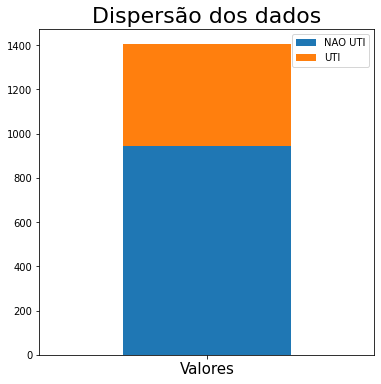

In [104]:
dispersao_rotulos.T.plot(kind='bar', stacked=True, figsize = (6,6))
plt.legend(['NAO UTI', 'UTI'])
plt.title('Dispersão dos dados', fontsize= 22)
plt.xticks(rotation=0, fontsize=15)
plt.show()

### Os dados não estão balanceados, devo me atentar no momento de realizar a separação de treino e teste

# Separação dos dados para treinamento e teste

In [107]:
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [111]:
print(f'Treinamento realizado com {len(x_train)} amostras e testado com {len(x_test)} amostras')

Treinamento realizado com 983 amostras e testado com 422 amostras


In [112]:
# Salvando dados para utilizar na rede neural

x_train.to_csv('../dados/x_train.csv', index=False)
x_test.to_csv('../dados/x_test.csv', index=False)
y_train.to_csv('../dados/y_train.csv', index=False)
y_test.to_csv('../dados/y_test.csv', index=False)
